In [2]:
import glob
import math
import os
import sys

import cv2
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import skimage.measure as ski
import re

from pathlib import Path
cur_dir = Path().resolve()
sys.path.append(str(cur_dir) + "/module")

##### オリエンタルモーター系コントローラ

In [68]:
pls_to_um = 0.005  # 1plsあたりの移動量[um/pls]
accel_rate = 30.000  # 加減速レート[ms/kHz]
drive_pls = 50000   # 運転パルス数[pls/s]=[Hz]
start_pls = 5000    # 起動パルス数[pls/s]=[Hz]
distance_um = 1400  # 目標移動量[um]

In [69]:
# 加減速時間[ms]
ta_ms =  accel_rate * (drive_pls - start_pls) / 1000
# 加減速距離[um]
accel_um = (ta_ms / 1000) * (drive_pls + start_pls) / 2 * pls_to_um
# 等速運転距離[um]
drive_um = distance_um - 2 * accel_um
# 等速運転時間[ms]
td_ms = drive_um / (drive_pls * pls_to_um) * 1000
# 総移動時間[ms]
total_ms = 2 * ta_ms + td_ms


In [70]:
print(ta_ms)
print(accel_um)
print(drive_um)
print(td_ms)
print(total_ms)

1350.0
185.625
1028.75
4115.0
6815.0


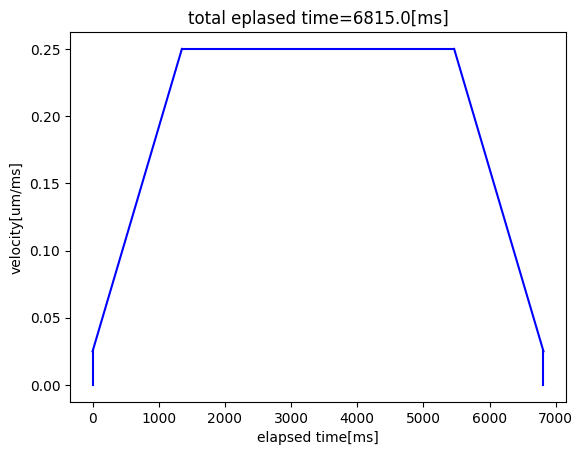

In [67]:
fig, ax = plt.subplots()
ax.set_xlabel('elapsed time[ms]')
ax.set_ylabel('velocity[um/ms]')
ax.set_title('total eplased time={}[ms]'.format(total_ms))
ax.plot([0, 0],[0, start_pls / 1000 * pls_to_um], color='b')
ax.plot([0, ta_ms], [start_pls / 1000 * pls_to_um, drive_pls / 1000 * pls_to_um], color='b')
ax.plot([ta_ms, ta_ms + td_ms], [drive_pls / 1000 * pls_to_um, drive_pls / 1000 * pls_to_um], color='b')
ax.plot([ta_ms + td_ms, ta_ms * 2 + td_ms], [drive_pls / 1000 * pls_to_um, start_pls / 1000 * pls_to_um], color='b')
ax.plot([2 * ta_ms + td_ms, 2 * ta_ms + td_ms],[0, start_pls / 1000 * pls_to_um], color='b')
plt.show()